## Implementação da Tranformada Discreta de Fourier - DFT 

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import unit_impulse

# Sinal no tempo de discreto
$x(n) =
\begin{cases} 
1, & \frac{N1}{2} \leq n < \frac{N1}{2} \\
0, & \text{c.c.}
\end{cases}$



In [5]:
def porta(n, N1):
    if n >= -N1 and n <= N1:
        return 1
    return 0

# Sinal no tempo discreto 2

In [6]:
def porta_2(N1, N):
    x = np.zeros(N)
    i = -N1
    for i in range(N1):
        if ((i%2) == 0):
            x[i] = 1
        else:
            x[i] = 0
    return x

In [7]:
N = 8 # Tamanho da DFT

N1 = 5 # Tamanho da porta simétrica em y

i =  N - N1

x = np.zeros(N)
for i in range(len(x)):
    if ( ((i+N-N1)%2) == 0 ):
        x[i] = 1
    else:
        x[i] = 0
print(x)

[0. 1. 0. 1. 0. 1. 0. 1.]


# DFT

Representação matricial

Vamos iniciar relembrando que a Transformada Discreta de Fourier (DFT) é uma representação discreta do espectro de frequências de sinais no tempo discreto x(n), cuja expressão é dada por:

$X[k] = \sum_{n=0}^{N-1} x(n) W_N^{kn}$,


sendo


$W_N = e^{-j\frac{2\pi}{N}}$.

Para um determinado \( k \) temos

$X[k] = x(0)e^{-j\frac{2\pi k \cdot 0}{N}} + x(1)e^{-j\frac{2\pi k \cdot 1}{N}} + \dots + x(N-1)e^{-j\frac{2\pi k (N-1)}{N}}$

que pode ser escrita como

$X[k] = 
\begin{bmatrix} 
1 & e^{-j\frac{2\pi k}{N}} & e^{-j\frac{2\pi k \cdot 2}{N}} & \dots & e^{-j\frac{2\pi k (N-1)}{N}}
\end{bmatrix}
\begin{bmatrix} 
x(0) \\ 
x(1) \\ 
x(2) \\ 
\vdots \\ 
x(N-1)
\end{bmatrix}$

estendendo essa representação para todos os valores de \( k \) obtemos

$\mathbf{X} =
\begin{bmatrix} 
1 & 1 & 1 & \dots & 1 \\ 
1 & e^{-j\frac{2\pi}{N}} & e^{-j\frac{2\pi \cdot 2}{N}} & \dots & e^{-j\frac{2\pi (N-1)}{N}} \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
1 & e^{-j\frac{2\pi (N-1)}{N}} & e^{-j\frac{2\pi (N-1) \cdot 2}{N}} & \dots & e^{-j\frac{2\pi (N-1)(N-1)}{N}} 
\end{bmatrix}
\begin{bmatrix} 
x(0) \\ 
x(1) \\ 
\vdots \\ 
x(N-1)
\end{bmatrix}$



In [68]:
# Parâmetros da DFT
N = 256 # Tamanho da DFT

k = np.array([np.arange(0, N)]) # Número de amostras
n = np.arange(0, N) # Índice do somatório
k_T = k.reshape(-1, 1) # Número de amostras organizadas como uma matriz Nx1

In [69]:
#//////////////////////////////////////////////////////////////////////////
#////////////////////////// FUNÇÕES DE ENTRADA ////////////////////////////
#//////////////////////////////////////////////////////////////////////////

# N1 = 5 # Tamanho da porta simétrica em y                                                                      
# func = np.array([porta(i, N1) for i in n]) # Sinal no tempo discreto

# func = porta_2(N1, N) # Sinal no tempo discreto

# Impulso 
# func = np.zeros(N) 
# func[2] = 1     # Deslocamento

# Sinal do tipo: x[n] = a^(n).u[n], |a|<1 
a = 0.5
N1 = 25 # Quantidade de pontos da exponecial
func = np.zeros(N) 
for i in range(N1):                                                              
    func[i] = a**i

#//////////////////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////////////////
#//////////////////////////////////////////////////////////////////////////

In [70]:
# Cálculo da DFT

func_T = func.reshape(-1, 1) # Amostras organizadas como uma matriz Nx1

Wn = np.exp(-2j*np.pi/N) # Definição de Wn

M_result = Wn**(k_T*n) # Matriz com as exponenciais complexas

DFT = M_result @ func_T


[Text(0.0, 0, '0'),
 Text(1.5707963267948966, 0, '$\\pi/2$'),
 Text(3.141592653589793, 0, '$\\pi$'),
 Text(4.71238898038469, 0, '$3\\pi/2$'),
 Text(6.283185307179586, 0, '$2\\pi$')]

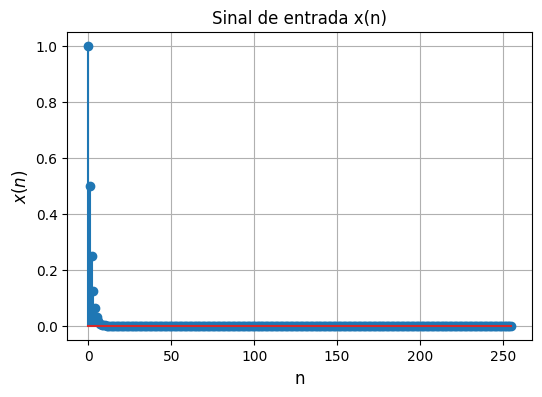

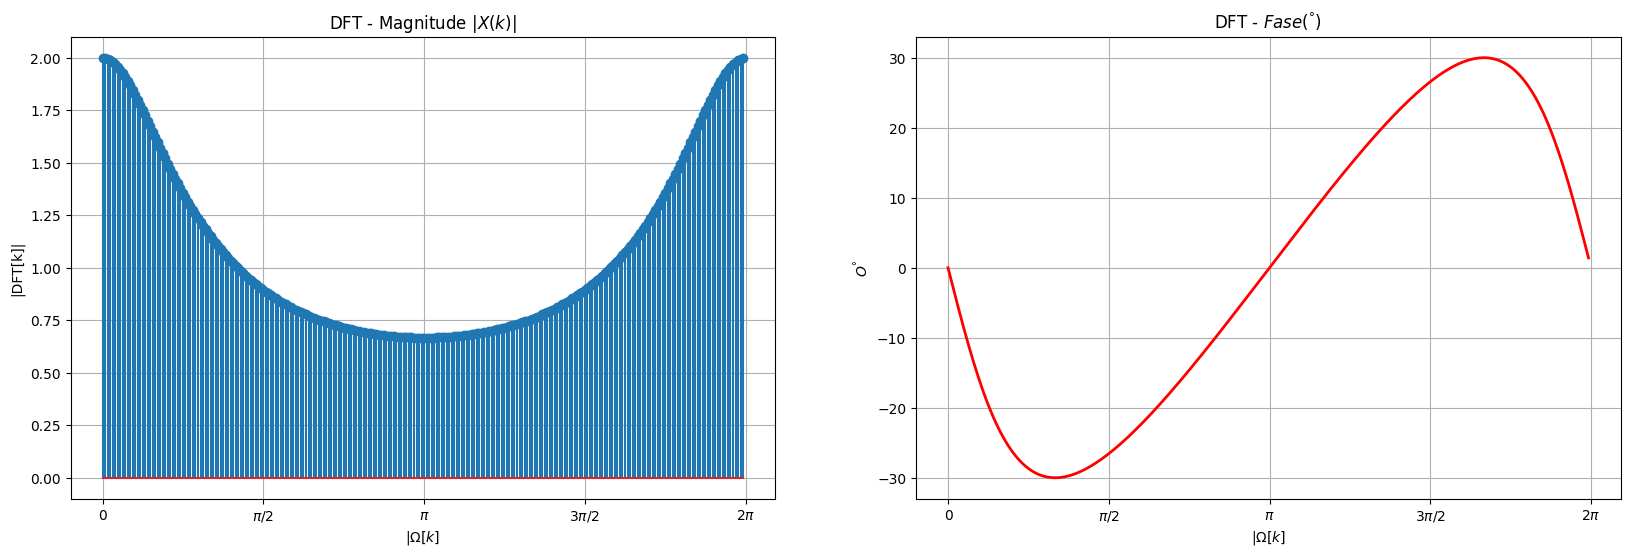

In [76]:

plt.figure(figsize=(6, 4))
plt.title('Sinal de entrada x(n)')
plt.stem(n, func)
plt.xlabel('n', fontsize=12)
plt.ylabel('$x(n)$', fontsize=12)
plt.grid()
# plt.xlim(-5,5)

xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
xticklabels = ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

fig, axs  = plt.subplots(1, 2, figsize=(20,6))

axs[0].stem(2*np.pi*k_T/N, np.abs(DFT.flatten()))
axs[0].set_xlabel('$|\Omega[k]$')
axs[0].set_ylabel('|DFT[k]|')
axs[0].grid()
axs[0].set_title('DFT - Magnitude |$X(k)$|')
axs[0].set_xticks(xticks)
axs[0].set_xticklabels(xticklabels)

axs[1].plot(2*np.pi*k_T/N, np.angle(DFT)*180/np.pi, lw=2, color='r')
axs[1].set_xlabel('$|\Omega[k]$')
axs[1].set_ylabel('$O^°$')
axs[1].grid()
axs[1].set_title('DFT - $Fase (^°)$')
axs[1].set_xticks(xticks)
axs[1].set_xticklabels(xticklabels)


# Gráfico (N x tempo de amostra)

In [ ]:
import time

start_time = time.time()

# Exibição das matrizes formatadas

In [ ]:
from IPython.display import display, Math

def print_latex_matrix(A):
    """Imprime uma matriz (real ou complexa) de qualquer dimensão em formato LaTeX no notebook Jupyter."""
    
    A = np.atleast_2d(A)  # Converte para matriz 2D se for um vetor ou escalar

    if A.ndim > 2:
        raise ValueError("Apenas matrizes 1D ou 2D são suportadas para exibição em LaTeX.")

    def format_complex(z):
        """Formata um número real ou complexo para exibição em LaTeX."""
        if isinstance(z, complex) or np.iscomplexobj(z):
            real_part = f"{z.real:.2f}" if z.real != 0 else ""
            imag_part = f"{abs(z.imag):.2f}j" if z.imag != 0 else ""
            sign = "+" if z.imag > 0 and z.real != 0 else "-"
            return f"{real_part}{sign}{imag_part}" if (z.real or z.imag) else "0"
        return f"{z:.2f}"  # Formata números reais com 2 casas decimais

    matrix_latex = r"\begin{bmatrix}" + " \\\\ ".join(
        [" & ".join(map(format_complex, row)) for row in A]
    ) + r"\end{bmatrix}"
    
    display(Math(matrix_latex))

# print_latex_matrix(len(k_T*n))
print_latex_matrix(m1)
print_latex_matrix(m2)
print_latex_matrix(m1 @ m2)
print(np.abs(m1))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[1 2]
